In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv("C:/Users/Aravi/PycharmProjects/Liar2-Misinformation-Network-Analysis/data/LIAR/cleaned_train")

In [3]:
# Apply custom theme and sizes
sns.set(style="whitegrid")
plt.rcParams.update({"axes.titlesize": 14, "axes.labelsize": 12})

In [4]:
# Define color map for political parties
party_colors = {
    "Democrat": "#1f77b4",     # Blue
    "Republican": "#d62728",   # Red
    "Independent": "#2ca02c",
    "Unknown": "#7f7f7f",
    "Other": "#9467bd"
}

In [5]:
def map_party(party):
    party = party.lower()
    if party in ["democrat", "democratic-farmer-labor"]:
        return "Democrat"
    elif party in ["republican", "tea-party-member", "ocean-state-tea-party-action"]:
        return "Republican"
    elif party in ["independent", "libertarian", "moderate"]:
        return "Independent"
    else:
        return "Other"

# Apply mapping
df["party_grouped"] = df["party"].apply(map_party)

# Print to verify
print(df["party_grouped"].value_counts())

party_grouped
Republican     4508
Democrat       3337
Other          2205
Independent     188
Name: count, dtype: int64


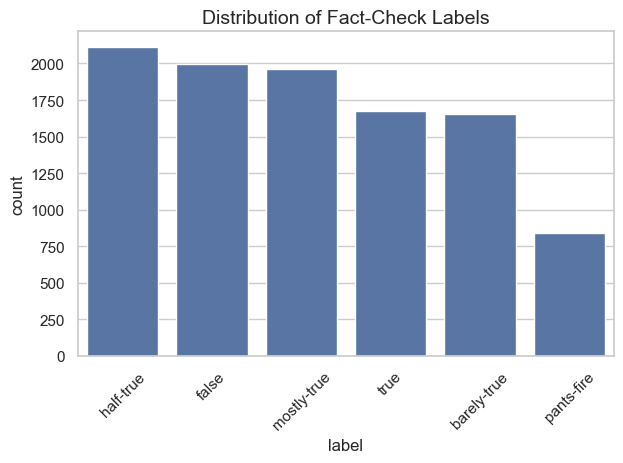

In [6]:
# 1. Distribution of Fact-Check Labels
sns.countplot(data=df, x='label', order=df['label'].value_counts().index)
plt.title("Distribution of Fact-Check Labels")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

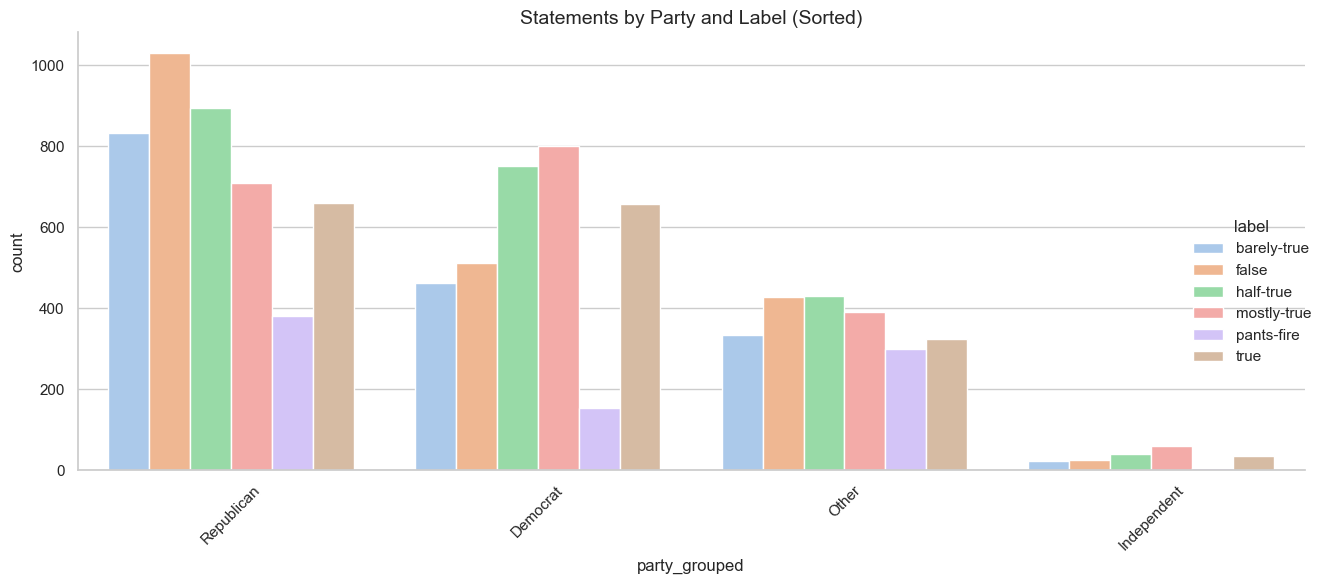

In [8]:
# 2. Party vs Label Distribution
party_label_dist = df.groupby(['party_grouped', 'label']).size().reset_index(name='count')
party_totals = party_label_dist.groupby('party_grouped')['count'].sum().sort_values(ascending=False)
sorted_parties = party_totals.index.tolist()
sns.catplot(
    data=party_label_dist,
    x='party_grouped',
    y='count',
    hue='label',
    order=sorted_parties,
    kind='bar',
    height=6,
    aspect=2,
    palette="pastel"
)

plt.title("Statements by Party and Label (Sorted)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

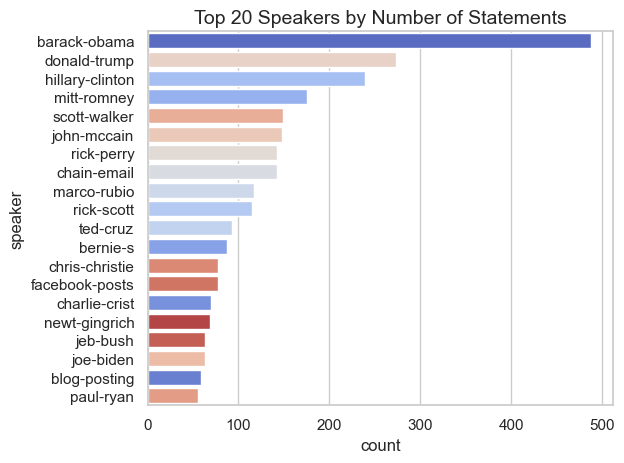

In [10]:
top_speakers = df['speaker'].value_counts().nlargest(20).index
df_top_speakers = df[df['speaker'].isin(top_speakers)]
sns.countplot(
    data=df_top_speakers,
    y='speaker',
    order=top_speakers,
    hue='speaker',  # Color each speaker
    palette='coolwarm',
    legend=False    # No need for redundant legend
)

plt.title("Top 20 Speakers by Number of Statements")
plt.tight_layout()
plt.show()

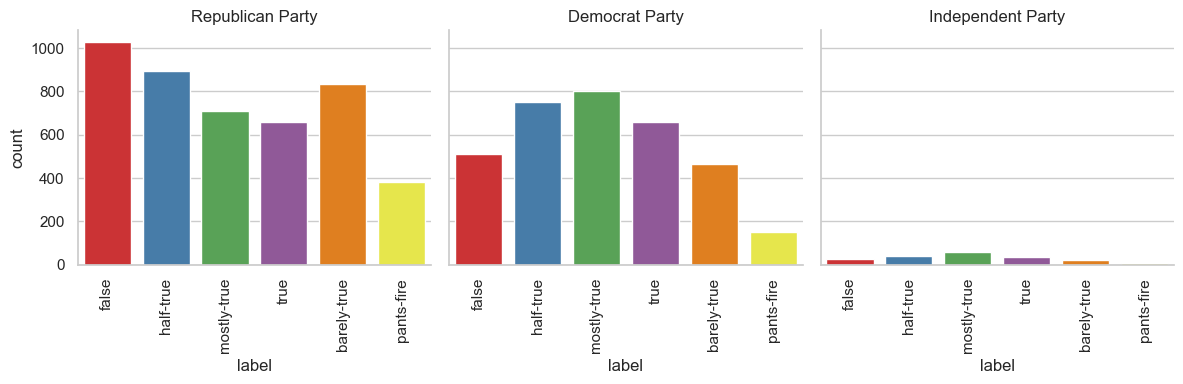

In [14]:
if not df_parties.empty:
    facet = sns.catplot(
        data=df_parties,
        x='label',
        hue='label',
        col='party_grouped',
        kind='count',
        col_wrap=3,
        height=4,
        palette='Set1',
        legend=False
    )
    facet.set_titles("{col_name} Party")
    for ax in facet.axes.flat:
        ax.tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()
else:
    print("Filtered DataFrame is empty. Check 'party_grouped' values.")

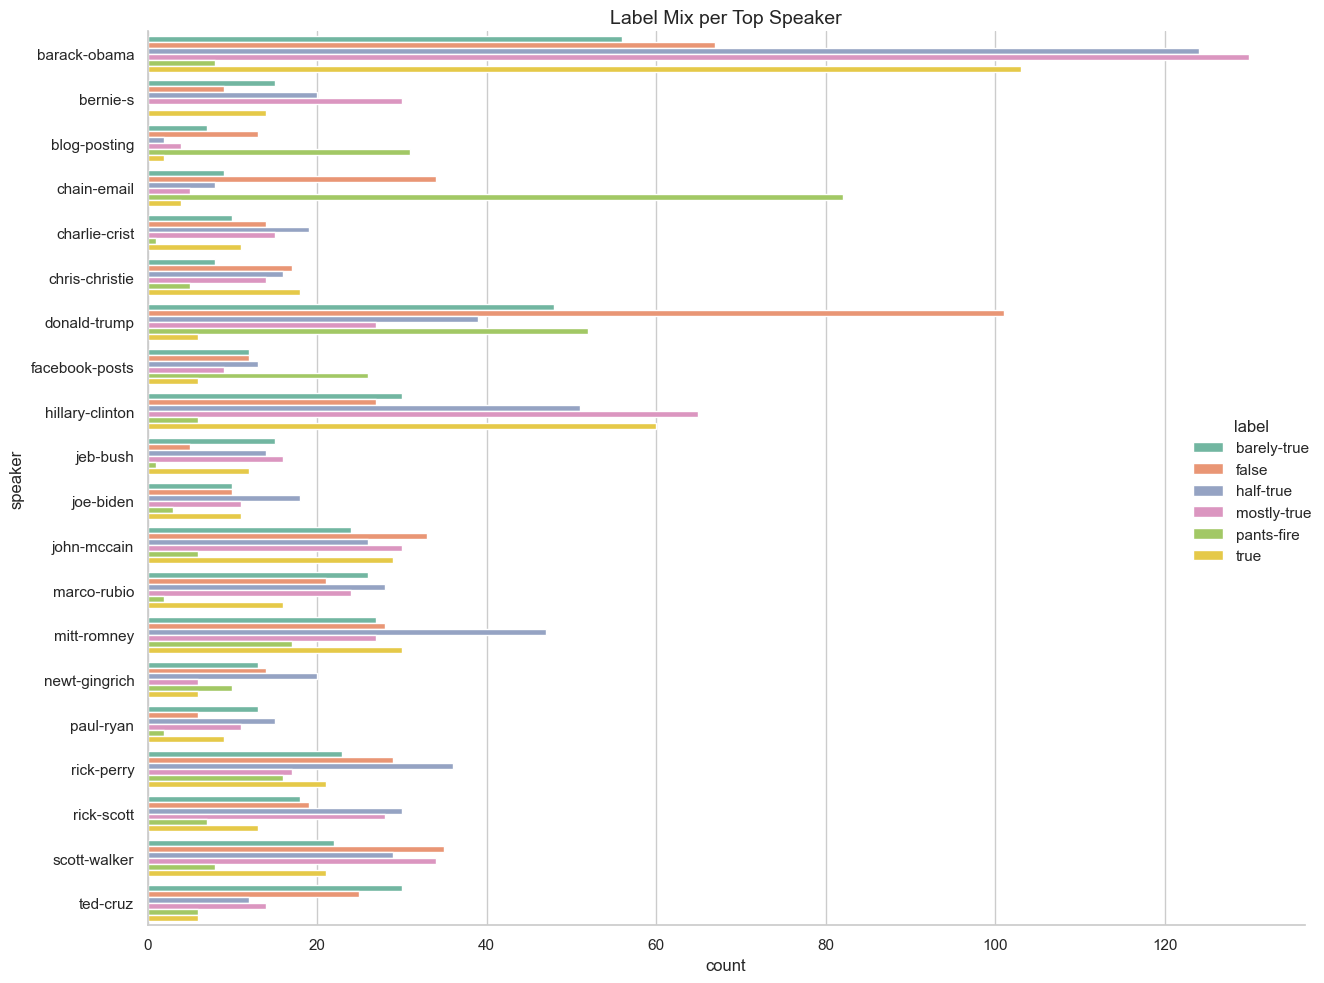

In [15]:
# 5. Mix of Truth and Falsehoods per Speaker
speaker_label_mix = df[df['speaker'].isin(top_speakers)].groupby(['speaker','label']).size().reset_index(name='count')
sns.catplot(data=speaker_label_mix, y='speaker', x='count', hue='label', kind='bar', height=10, aspect=1.2, palette='Set2')
plt.title("Label Mix per Top Speaker")
plt.tight_layout()
plt.show()

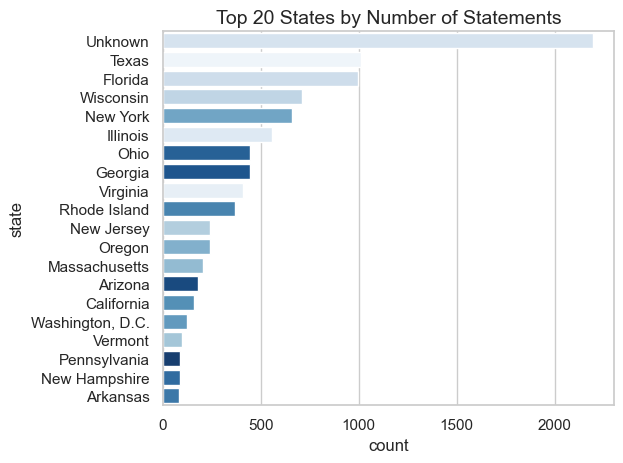

In [17]:
top_states = df['state'].value_counts().nlargest(20).index
df_states = df[df['state'].isin(top_states)]
sns.countplot(
    data=df_states,
    y='state',
    order=top_states,
    hue='state',
    palette='Blues',
    legend=False  
)

plt.title("Top 20 States by Number of Statements")
plt.tight_layout()
plt.show()

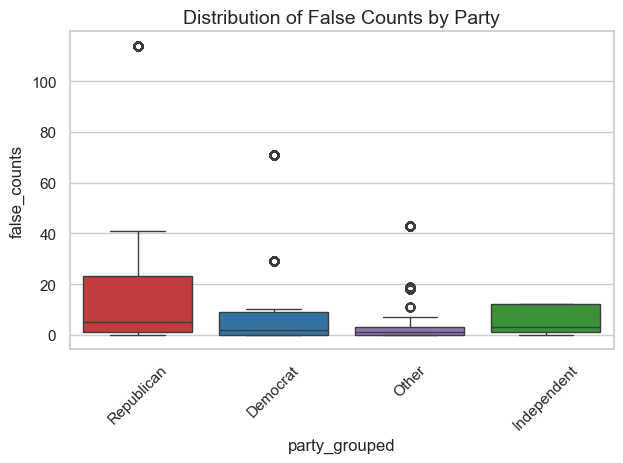

In [20]:
# 7. Boxplot: False counts per party
sns.boxplot(data=df, x='party_grouped', y='false_counts', hue='party_grouped', palette=party_colors, dodge=False, legend=False)
plt.title("Distribution of False Counts by Party")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

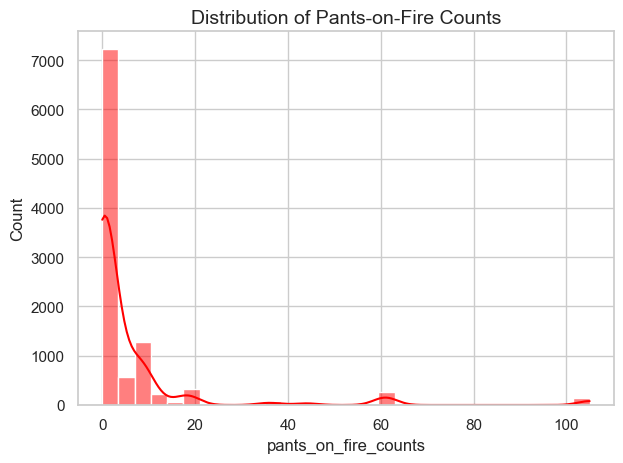

In [19]:
# 8. Distribution of Pants-on-Fire Counts
sns.histplot(df['pants_on_fire_counts'], bins=30, kde=True, color='red')
plt.title("Distribution of Pants-on-Fire Counts")
plt.tight_layout()
plt.show()

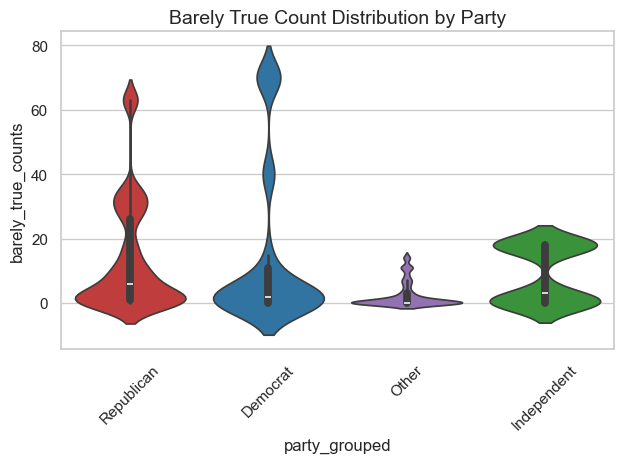

In [22]:
sns.violinplot(data=df, x='party_grouped', y='barely_true_counts', hue='party_grouped', palette=party_colors, dodge=False, legend=False)
plt.title("Barely True Count Distribution by Party")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

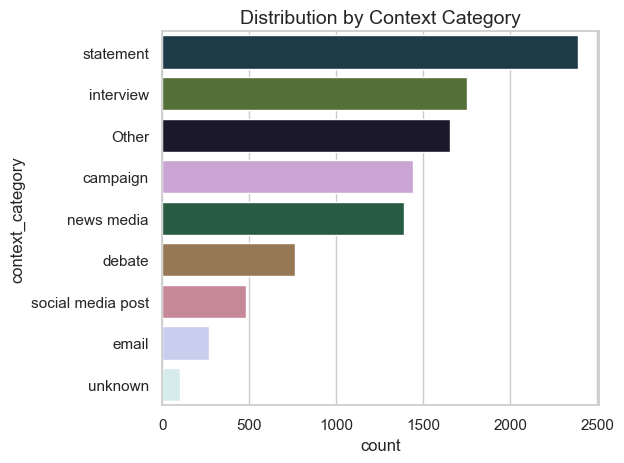

In [24]:
# 10. Count of Statements by Context Category
sns.countplot(data=df, y='context_category', order=df['context_category'].value_counts().index, hue='context_category', palette='cubehelix', legend=False)
plt.title("Distribution by Context Category")
plt.tight_layout()
plt.show()

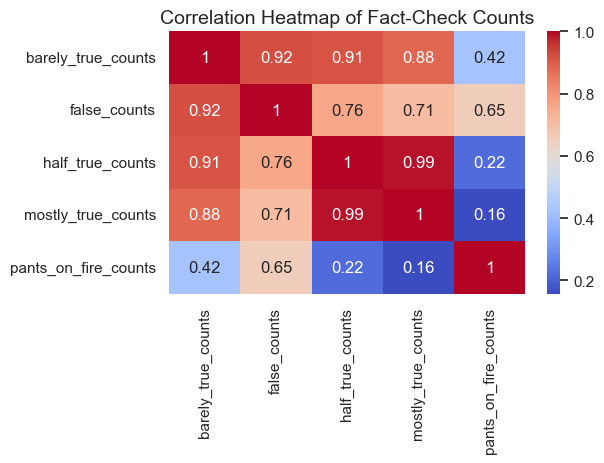

In [25]:
sns.heatmap(df[[
    'barely_true_counts', 'false_counts', 'half_true_counts',
    'mostly_true_counts', 'pants_on_fire_counts'
]].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Fact-Check Counts")
plt.tight_layout()
plt.show()

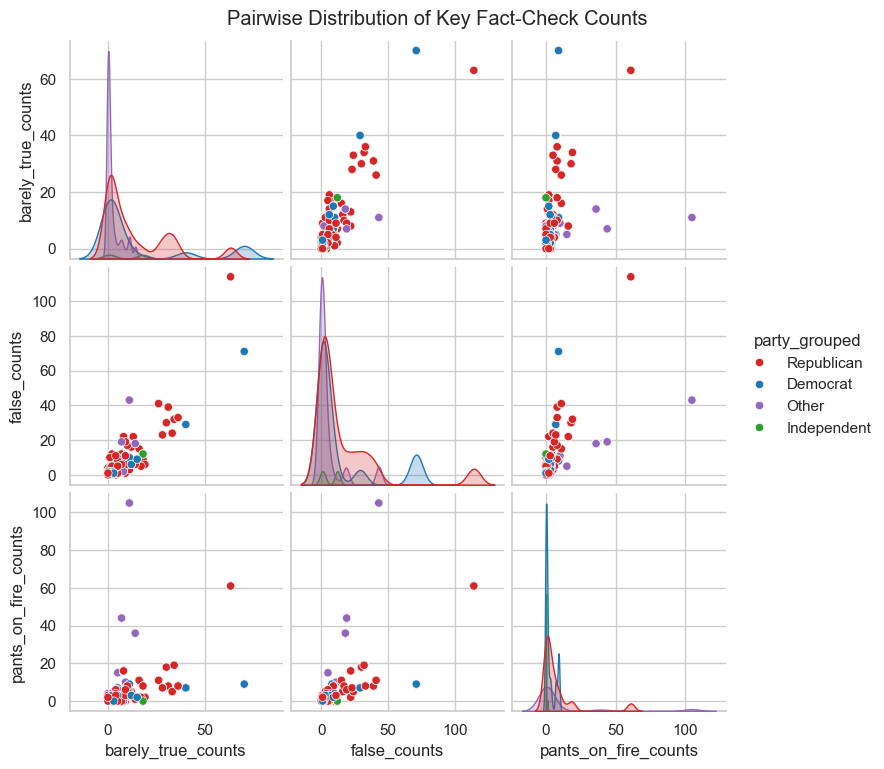

In [26]:
# 12. Pairplot of Count Distributions by Party
sns.pairplot(df, vars=['barely_true_counts', 'false_counts', 'pants_on_fire_counts'], hue='party_grouped', palette=party_colors)
plt.suptitle("Pairwise Distribution of Key Fact-Check Counts", y=1.02)
plt.show()

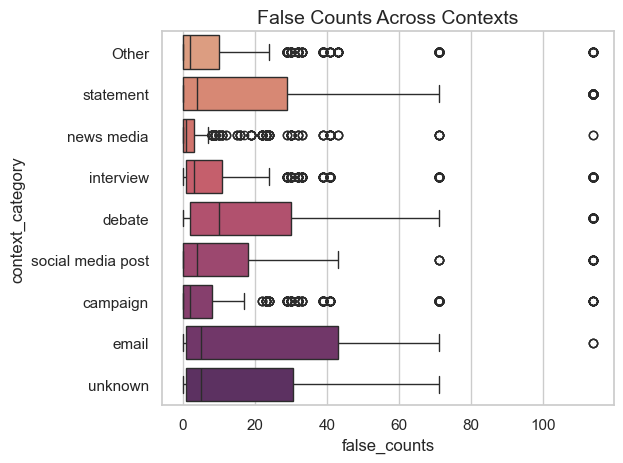

In [28]:
# 13. False Count Distribution per Context Category
sns.boxplot(data=df, y='context_category', x='false_counts', hue='context_category', palette='flare', legend=False)
plt.title("False Counts Across Contexts")
plt.tight_layout()
plt.show()

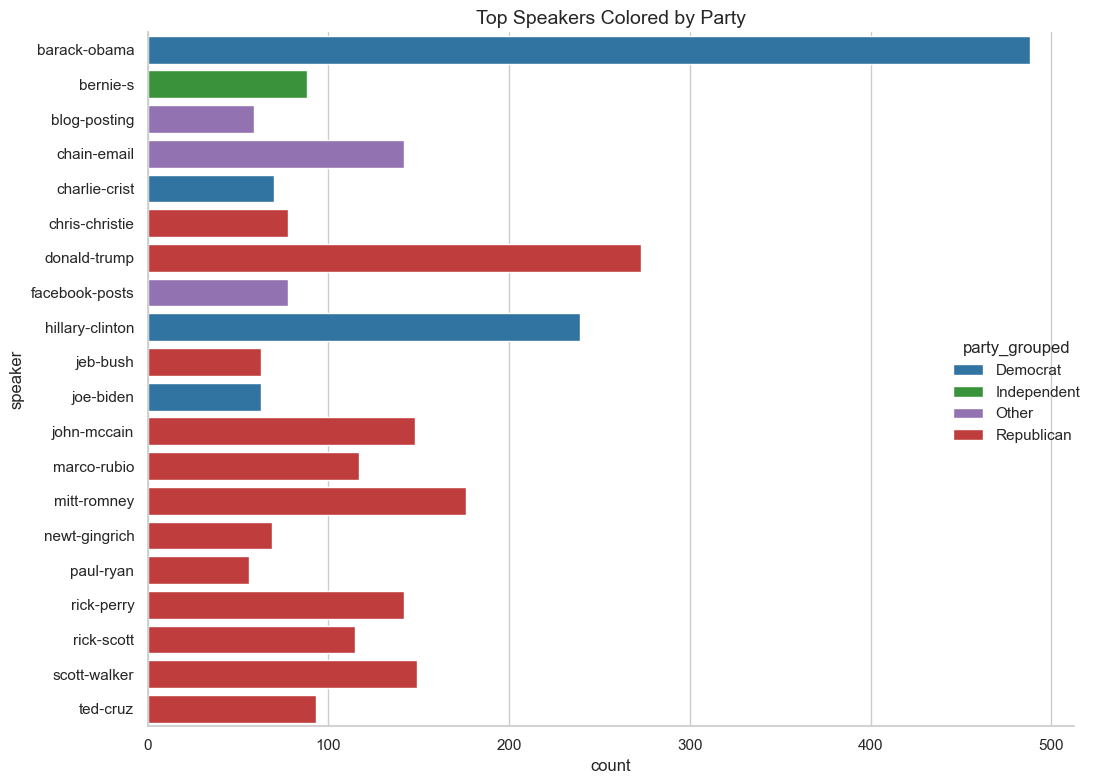

In [29]:
# 14. Statements by Top Speakers and Party
top_speaker_party = df[df['speaker'].isin(top_speakers)].groupby(['speaker', 'party_grouped']).size().reset_index(name='count')
sns.catplot(data=top_speaker_party, y='speaker', x='count', hue='party_grouped', kind='bar', palette=party_colors, height=8, aspect=1.2)
plt.title("Top Speakers Colored by Party")
plt.tight_layout()
plt.show()

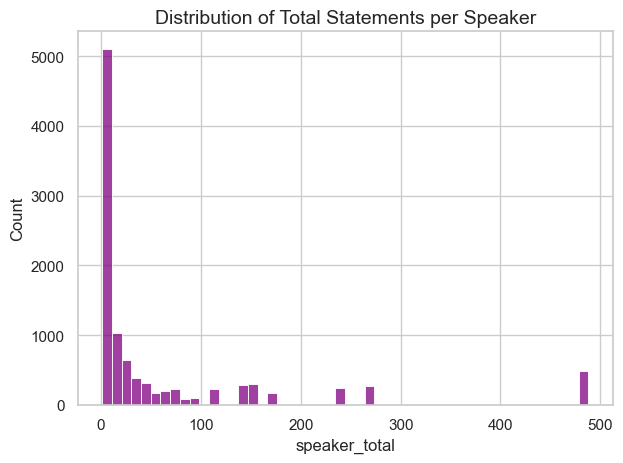

In [34]:
# 15. Histogram of Total Statements per Speaker
df['speaker_total'] = df.groupby('speaker')['label'].transform('count')
sns.histplot(df['speaker_total'], bins=50, color='purple')
plt.title("Distribution of Total Statements per Speaker")
plt.tight_layout()
plt.show()

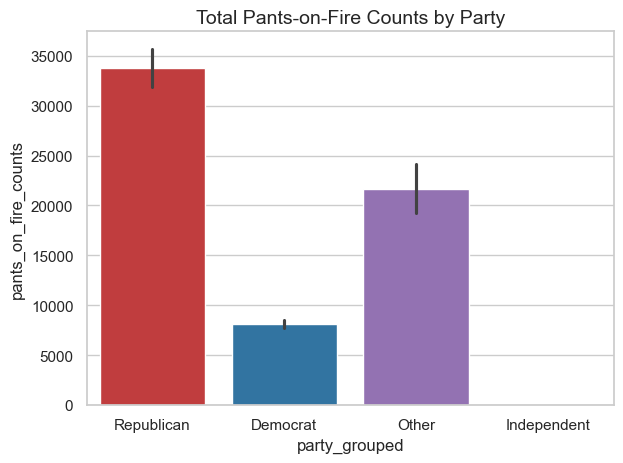

In [36]:
# 18. Party-Wise Distribution of Pants-on-Fire Counts
sns.barplot(data=df, x='party_grouped', y='pants_on_fire_counts', hue='party_grouped', estimator=sum, palette=party_colors, dodge=False, legend=False)
plt.title("Total Pants-on-Fire Counts by Party")
plt.tight_layout()
plt.show()

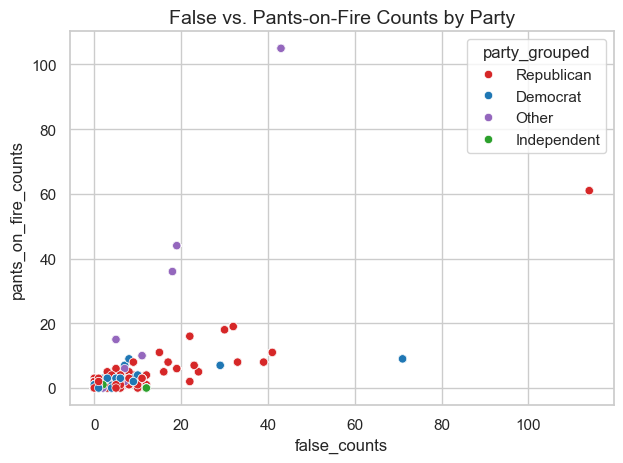

In [37]:
# 19. Scatterplot of False vs. Pants-on-Fire
sns.scatterplot(data=df, x='false_counts', y='pants_on_fire_counts', hue='party_grouped', palette=party_colors)
plt.title("False vs. Pants-on-Fire Counts by Party")
plt.tight_layout()
plt.show()

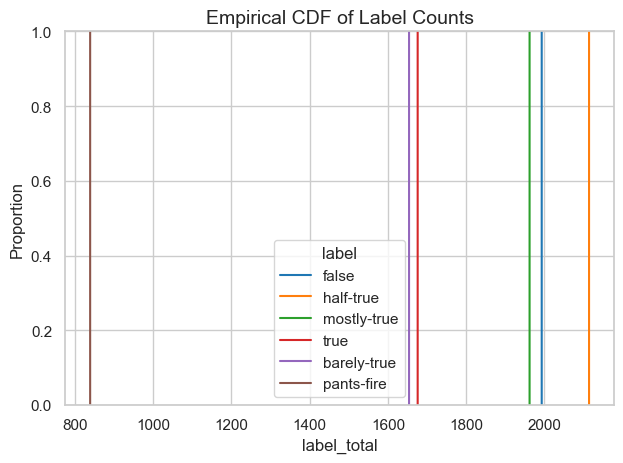

In [38]:
# 20. Cumulative Distribution of Label Counts
df['label_total'] = df.groupby('label')['label'].transform('count')
sns.ecdfplot(data=df, x='label_total', hue='label', palette='tab10')
plt.title("Empirical CDF of Label Counts")
plt.tight_layout()
plt.show()

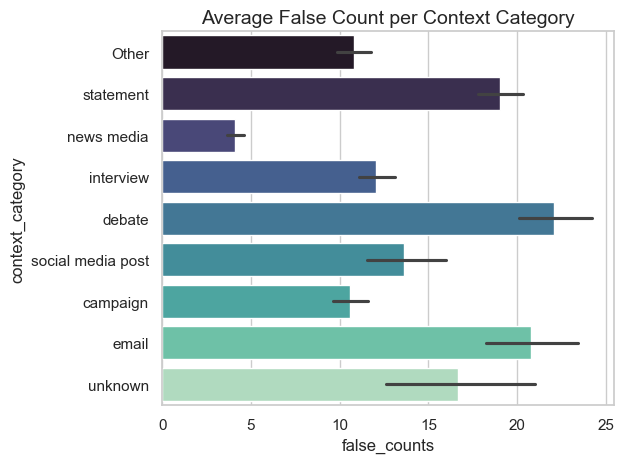

In [43]:
# 21. Barplot of Average False Counts by Context
sns.barplot(data=df, y='context_category', x='false_counts', estimator='mean', hue='context_category', palette='mako', legend=False)
plt.title("Average False Count per Context Category")
plt.tight_layout()
plt.show()

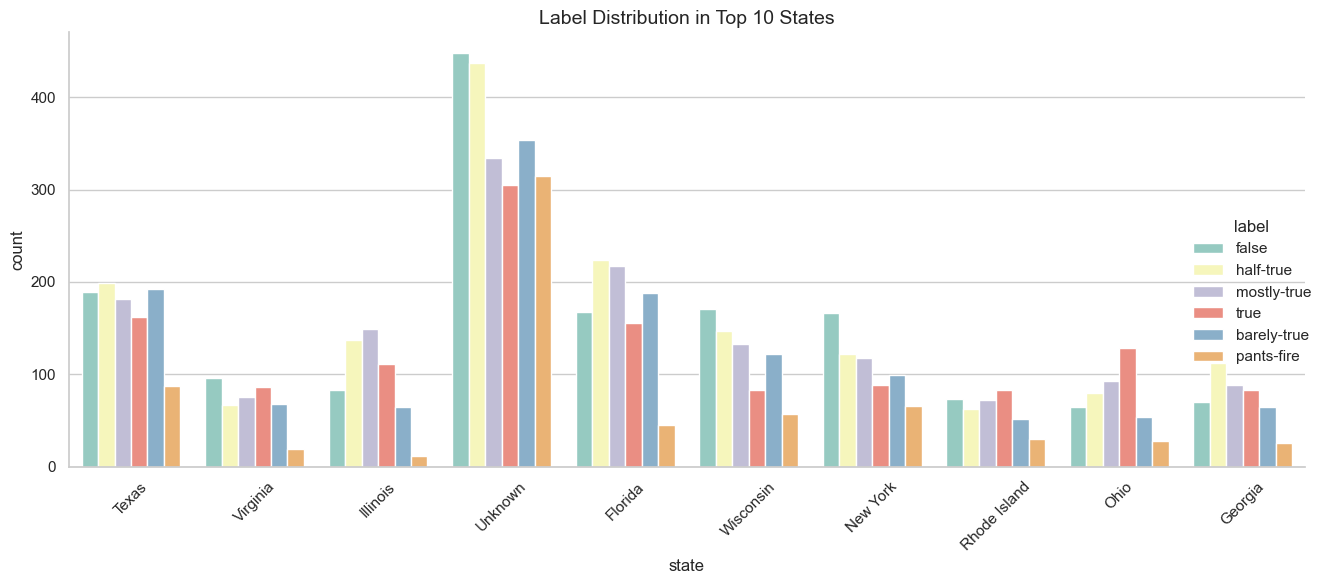

In [40]:
# 22. Label Proportions by State (Top 10 States)
top_states_10 = df['state'].value_counts().nlargest(10).index
df_states_10 = df[df['state'].isin(top_states_10)]
sns.catplot(data=df_states_10, x='state', hue='label', kind='count', height=6, aspect=2, palette='Set3')
plt.title("Label Distribution in Top 10 States")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

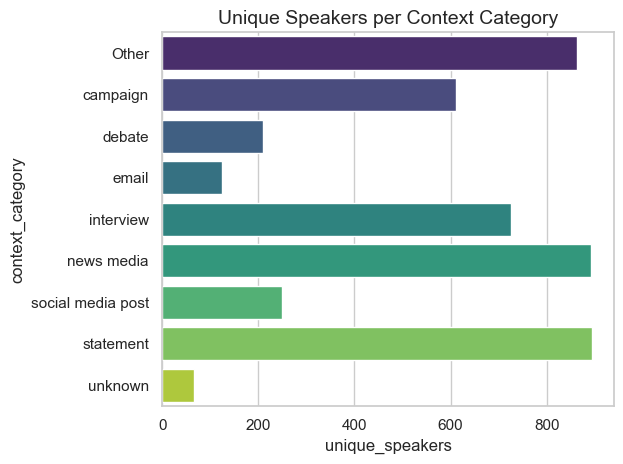

In [44]:
# 23. Countplot of Speaker Diversity per Context
df_context_speaker = df.groupby('context_category')['speaker'].nunique().reset_index(name='unique_speakers')
sns.barplot(data=df_context_speaker, x='unique_speakers', y='context_category', hue='context_category', palette='viridis', legend=False)
plt.title("Unique Speakers per Context Category")
plt.tight_layout()
plt.show()

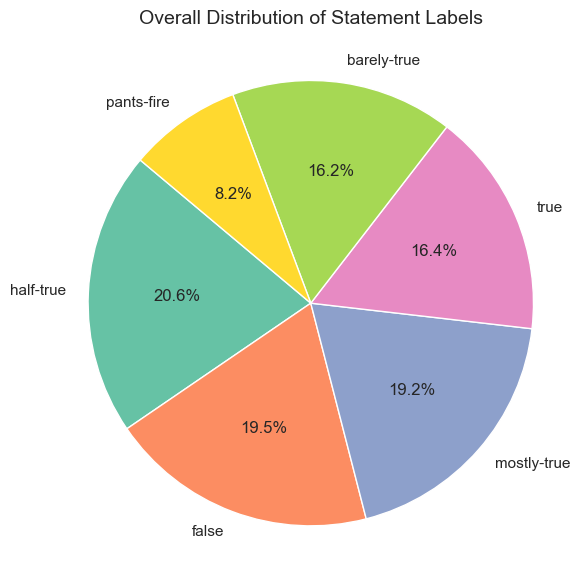

In [45]:
label_counts = df['label'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Overall Distribution of Statement Labels")
plt.axis('equal')
plt.tight_layout()
plt.show()

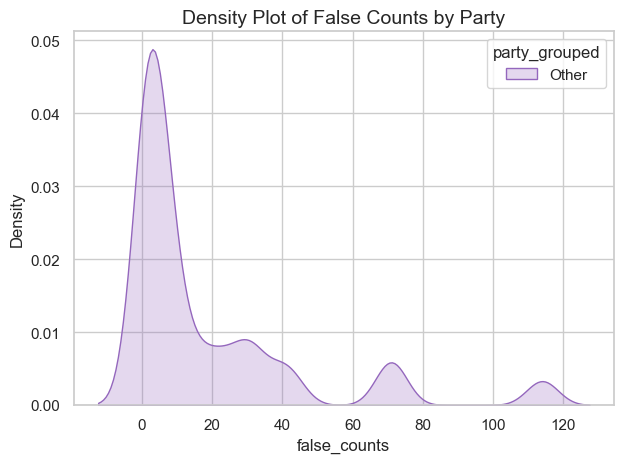

In [29]:
# 27. KDE Plot of False Counts by Party
df_false = df[df['false_counts'] > 0]
sns.kdeplot(data=df_false, x='false_counts', hue='party_grouped', fill=True, common_norm=False, palette=party_colors)
plt.title("Density Plot of False Counts by Party")
plt.tight_layout()
plt.show()

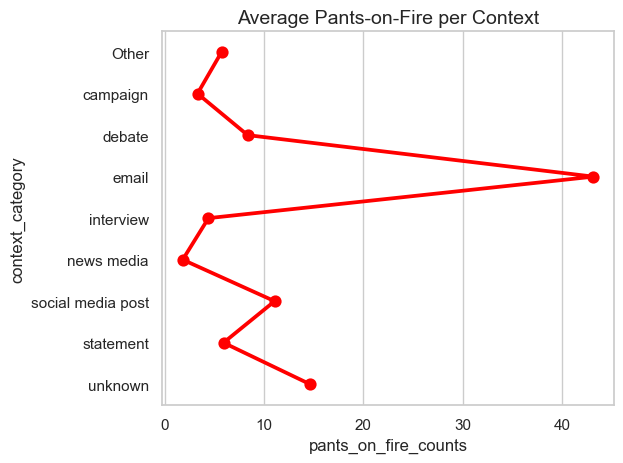

In [30]:
# 28. Point Plot of Context vs Average Pants-on-Fire
context_pof = df.groupby('context_category')['pants_on_fire_counts'].mean().reset_index()
sns.pointplot(data=context_pof, y='context_category', x='pants_on_fire_counts', color='red')
plt.title("Average Pants-on-Fire per Context")
plt.tight_layout()
plt.show()

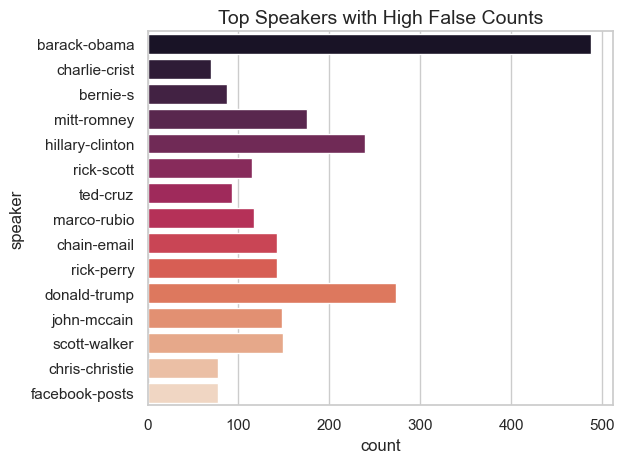

In [33]:
# 29. Countplot of High False Speakers
high_false_speakers = df[df['false_counts'] > 5]['speaker'].value_counts().head(15).index
df_high_false = df[df['speaker'].isin(high_false_speakers)]
sns.countplot(data=df_high_false, y='speaker', hue='speaker', palette='rocket', legend=False)
plt.title("Top Speakers with High False Counts")
plt.tight_layout()
plt.show()

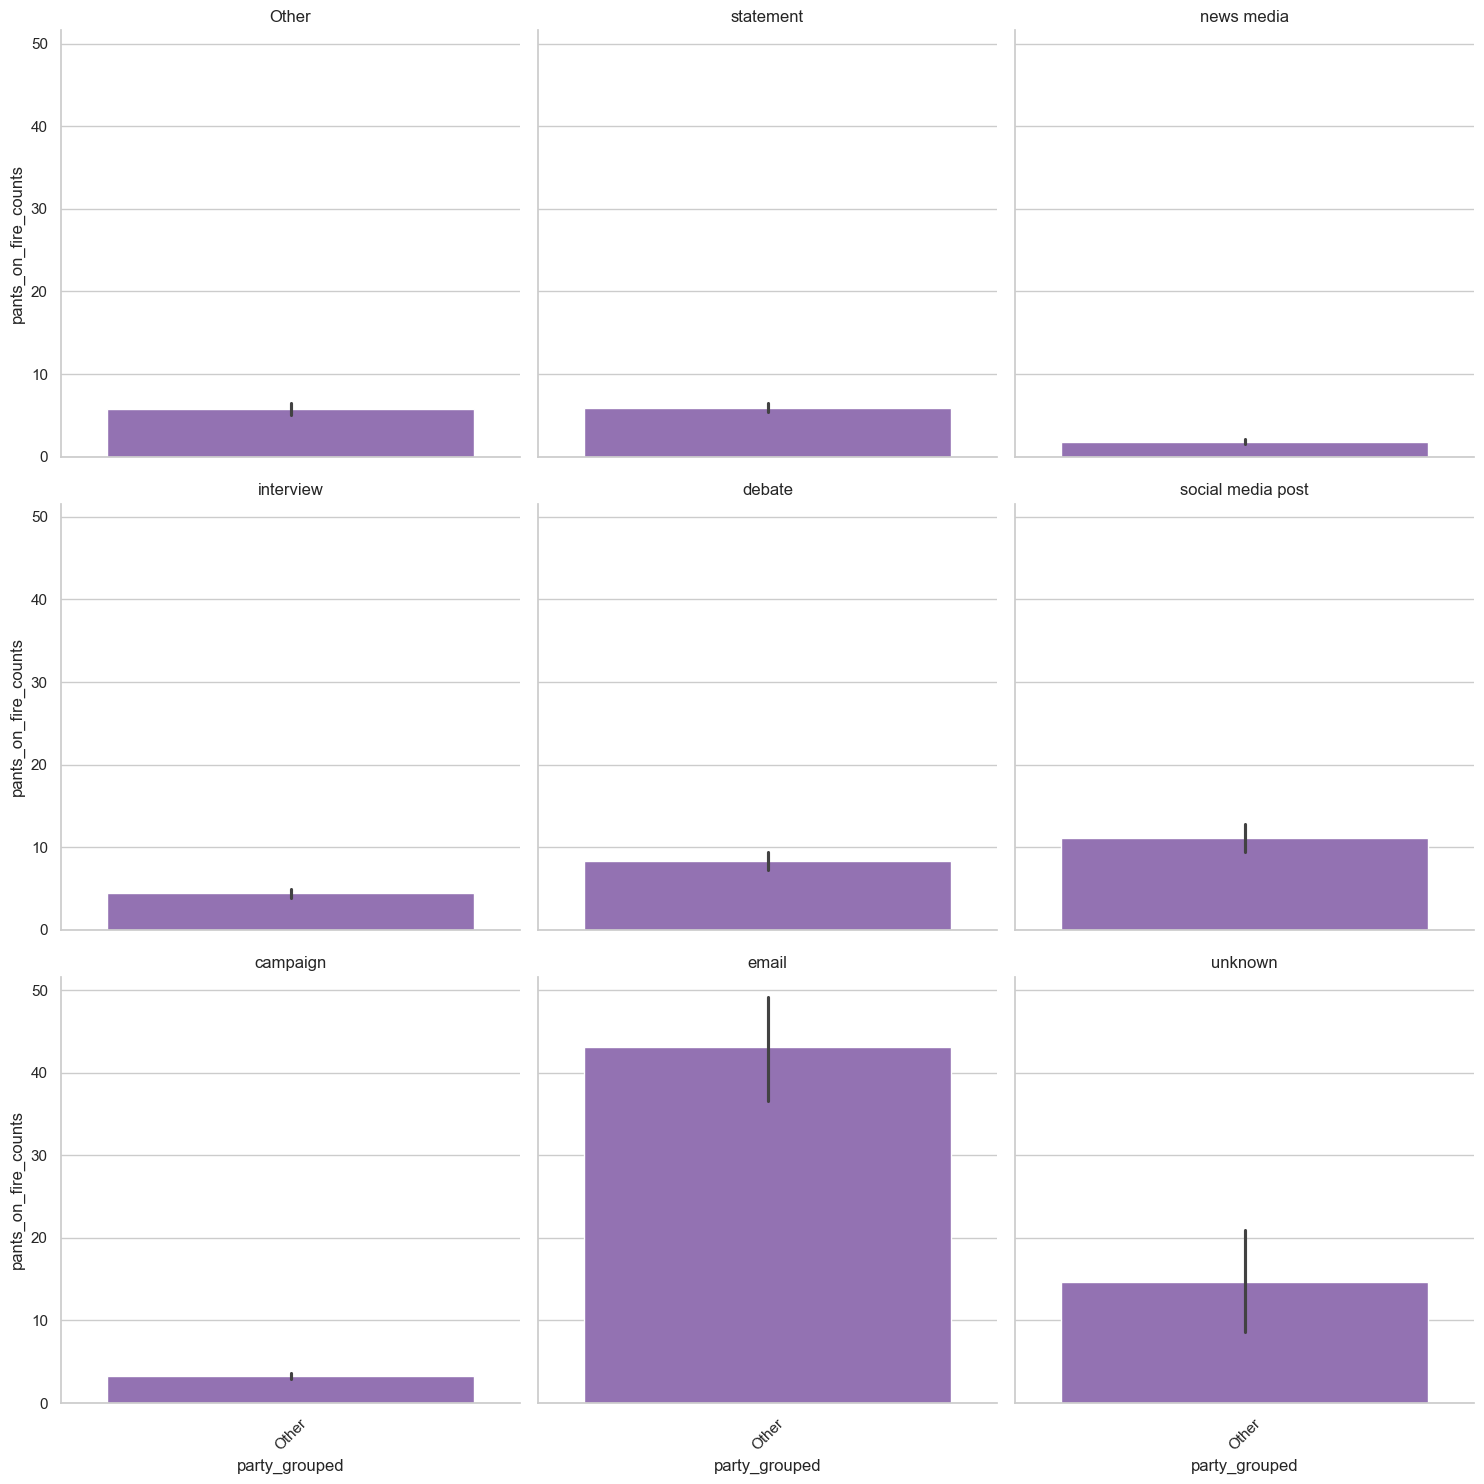

In [34]:
facet = sns.catplot(data=df, x='party_grouped', y='pants_on_fire_counts', hue='party_grouped', col='context_category', kind='bar', col_wrap=3, palette=party_colors, legend=False)
facet.set_titles("{col_name}")
for ax in facet.axes.flat:
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()